# Análisis y automatización de informes

En este apartado vamos importar archivos desde Excel, realizar un análisis mediante la librería pandas, y automatizar la realización de informes.

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [278]:
plt.close("all")

In [279]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [280]:
import yfinance as yf

Una vez hemos importado todas las librería que necesitamos, lo primero que vamos a hacer es importar un fichero de Excel. En este caso, el fichero lo he descargado de la página de Wikipedia a través del asistente disponible en Excel que nos permite importar tablas desde páginas web.

Pandas contiene una serie de funciones que nos permiten importar ficheros de distintas clases, si ponemos pd.read y a continuación damos a tabulador podemos comprobar que nos permite leer ficheros csv, excel, json, etc. Nos tenemos que asegurar que nuestro archivo python y el archivo que queremos importar se encuentran guardados en el mismo sitio, y a partir de aquí solo debemos indicar el nombre del mismo más la terminación.

Igualmente podemos indicar si tiene encabezados, si queremos que esté indexado por alguna de sus columnas o cualquier otro parametro.


In [311]:
IBEX = pd.read_excel("IBEX.xlsx", index_col='Ticker')

Una vez importado podemos ver nuestro archivo:

In [312]:
IBEX

,Empresa,Sede,Entrada,Sector,ISIN,Ponderación
Ticker,,,,,,
ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37
ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52
ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53
AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61
ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40
AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74
MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75
SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45
SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75


Mediante info(), podemos saber el nombre de nuestras columnas, y qué tipo de datos forma nuestro archivo. En este caso son 7 columnas, con un total de 35 filas (de la 0 a la 34), siendo entrada y ponderación de tipo númerico, mientras el resto son nombres. 

In [283]:
IBEX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticker       35 non-null     object 
 1   Empresa      35 non-null     object 
 2   Sede         35 non-null     object 
 3   Entrada      35 non-null     int64  
 4   Sector       35 non-null     object 
 5   ISIN         35 non-null     object 
 6   Ponderación  35 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ KB


Continuamos ahora buscando más información de las empresas que componen el Ibex. Ahora vamos a extraer información de sus cotizaciones y vamos a complementar la información que disponemos. 

En primer lugar, generamos una lista con la columna Ticker, que son los simbolos que utiliza Yahoo Finance para realizar publicaciones. 

In [302]:
simbolos = IBEX['Ticker'].tolist() + ['^IBEX']
cotizaciones = yf.download(simbolos, period='3mo', auto_adjust=True)


[*********************100%***********************]  36 of 36 completed


A continuación podemos ver que hemos extraído la información de cotización de las empresas en los últimos 3 meses. Vamos a calcular la Beta de las empresas, y añadir la columna en el DataFrame Ibex

In [303]:
cotizaciones

Close                                                    \
               ACS.MC  ACX.MC     AENA.MC ALM.MC     AMS.MC      ANA.MC   
Date                                                                      
2021-01-20  28.387878   9.566  135.600006  11.95  56.740002  128.699997   
2021-01-21  27.177999   9.654  132.199997  11.82  55.259998  128.800003   
2021-01-22  27.000000   9.376  130.699997  11.54  54.840000  128.800003   
2021-01-25  26.469999   9.202  128.699997  11.49  52.259998  129.000000   
2021-01-26  26.250000   9.356  128.500000  11.53  53.439999  132.600006   
...               ...     ...         ...    ...        ...         ...   
2021-04-14  27.850000  11.835  138.750000  12.55  59.439999  138.399994   
2021-04-15  27.690001  11.600  137.899994  12.55  59.080002  138.600006   
2021-04-16  28.059999  11.765  138.649994  12.55  58.400002  140.500000   
2021-04-19  28.400000  11.650  141.050003  12.71  59.099998  140.199997   
2021-04-20  27.219999  11.505  134.699997  12.69  56.139999  139.800003   

                                                 ...  Volume           \
           BBVA.MC    BKT.MC CABK.MC     CIE.MC  ...  PHM.MC   REE.MC   
Date                                             ...                    
2021-01-20  4.0510  4.735713  2.1350  22.160000  ...   80513  1561213   
2021-01-21  4.0350  4.939847  2.1360  22.000000  ...  181354  1113048   
2021-01-22  4.0020  4.887328  2.0520  21.559999  ...  187368  1221063   
2021-01-25  3.8870  4.663374  1.9905  20.740000  ...  118569  1150619   
2021-01-26  3.9440  4.778324  2.0120  21.400000  ...  840370  1726413   
...            ...       ...     ...        ...  ...     ...      ...   
2021-04-14  4.4855  5.830000  2.5880  21.600000  ...   65268  1441435   
2021-04-15  4.3375  5.714000  2.5350  21.840000  ...  106555   873863   
2021-04-16  4.3625  5.800000  2.5580  23.920000  ...   62112  1733751   
2021-04-19  4.5135  5.892000  2.5940  23.440001  ...   88487  1926112   
2021-04-20  4.3125  5.640000  2.4990  23.540001  ...   80747  1650195   

                                                                              \
              REP.MC    SAB.MC    SAN.MC  SGRE.MC   SLR.MC    TEF.MC  VIS.MC   
Date                                                                           
2021-01-20   5764107  33503122  56048675  1104419   773183   7011878   55406   
2021-01-21  11694014  38457573  83061544  1443516   682154  16263597   68644   
2021-01-22  12828860  82590017  82196849   918163   851068  18359320   99592   
2021-01-25   8274994  42911454  50395819  1216059   729093   9356340   62017   
2021-01-26   6075048  33514549  39204006   910353  1608656   7631577   51337   
...              ...       ...       ...      ...      ...       ...     ...   
2021-04-14  16104130  31658513  33824829  1064813  1036005  16080422   48726   
2021-04-15   4314645  27866302  34442258   801424  1248944  13018244   88391   
2021-04-16  10090827  25541663  37246275  6751795  6929989  16582943   73447   
2021-04-19   4130809  35412137  75691120   989139  2525252  12872013  123346   
2021-04-20  10296071  33291719  74153635  1353041  1919354  15485390   66345   

                       
                ^IBEX  
Date                   
2021-01-20  147519500  
2021-01-21  179934200  
2021-01-22  233703000  
2021-01-25  218852300  
2021-01-26  177642900  
...               ...  
2021-04-14  133519000  
2021-04-15  146073800  
2021-04-16  176861600  
2021-04-19  171375300  
2021-04-20  214621637  

[63 rows x 180 columns]

In [336]:
renta = np.log(1 + cotizaciones.loc[:,'Close'].pct_change()).dropna(how = 'all') #calculamos la rentabilidad
var = renta['^IBEX'].var() #calculamos la varianza del mercado
beta = renta.cov()/var #calculamos la beta con la covarianza de los valores
beta = beta['^IBEX'].head(35).to_frame('Beta') #selecionamos la columna de Ibex, que nos da las Betas de todos los valores, y renombramos la columna
beta = beta.reset_index() #quitamos el índice para convertirlo en columna
beta = beta.rename(columns={'index':'Ticker'}) #renombramos la columna para que coincida con DF Ibex

In [337]:
beta

,Ticker,Beta
0,ACS.MC,1.246782
1,ACX.MC,1.149675
2,AENA.MC,1.248785
3,ALM.MC,0.165653
4,AMS.MC,1.806264
5,ANA.MC,0.429087
6,BBVA.MC,1.848664
7,BKT.MC,1.405018
8,CABK.MC,1.151517
9,CIE.MC,0.308580


In [338]:
beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  35 non-null     object 
 1   Beta    35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


Vemos que nuestro DF beta contiene 35 filas, con dos columnas, una de ellas es ticker, que coincide con el DF Ibex, que usaremos para unir ambos dataframe.

In [341]:
unir  = pd.merge(IBEX, beta, on='Ticker', how='outer')
unir

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación,Beta
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37,0.429087
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52,1.149675
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53,1.246782
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61,1.248785
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40,0.165653
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74,1.806264
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75,1.530234
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45,1.758494
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75,1.562094
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93,1.405018


Vamos a añadir ahora el precio del día. Para ello vamos a extraer el dato de la cotización del día, y después lo vamos a añadir a nuestro dataframe.

In [344]:
simbolos = unir['Ticker'].tolist()
cotizaciones = yf.download(simbolos, period='1d', auto_adjust=True)

[*********************100%***********************]  35 of 35 completed


In [377]:
cotiza = cotizaciones.loc[:,'Close'].T #Selecionamos el precio de cierre del día, y trasponemos la columna
cotiza = cotiza.reset_index() #quitamos el index, para dejar los ticker como una columna más
cotiza.columns=['Ticker','Precio del día'] #renombramos las columnas
cotiza

,Ticker,Precio del día
0,ACS.MC,27.219999
1,ACX.MC,11.505000
2,AENA.MC,134.699997
3,ALM.MC,12.690000
4,AMS.MC,56.139999
5,ANA.MC,139.800003
6,BBVA.MC,4.312500
7,BKT.MC,5.640000
8,CABK.MC,2.499000
9,CIE.MC,23.540001


In [378]:
cotiza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ticker          35 non-null     object 
 1   Precio del día  35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


Ahora volemos a unir nuestros dataframe, y podemos comprobar que tenemos incorporado el precio del día.

In [379]:
unido = pd.merge(unir, cotiza, on='Ticker', how="outer")

In [380]:
unido

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación,Beta,Precio del día
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37,0.429087,139.800003
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52,1.149675,11.505000
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53,1.246782,27.219999
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61,1.248785,134.699997
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40,0.165653,12.690000
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74,1.806264,56.139999
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75,1.530234,23.795000
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45,1.758494,0.457000
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75,1.562094,2.851500
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93,1.405018,5.640000


Podemos convertir nuestro dataframe en una tabla dinámica mediante pivot_table, y comprobamos que utiliza los campos númericos para realizar esta tabla

In [381]:
unido.pivot_table(index = "Ticker")

,Beta,Entrada,Ponderación,Precio del día
Ticker,,,,
ACS.MC,1.246782,1998,1.53,27.219999
ACX.MC,1.149675,2015,0.52,11.505000
AENA.MC,1.248785,2015,3.61,134.699997
ALM.MC,0.165653,2020,0.40,12.690000
AMS.MC,1.806264,2011,4.74,56.139999
ANA.MC,0.429087,2015,1.37,139.800003
BBVA.MC,1.848664,1992,5.12,4.312500
BKT.MC,1.405018,1992,0.93,5.640000
CABK.MC,1.151517,2009,3.70,2.499000


Podemos crear una tabla dinamica asignando distinta información. Index nos marcará la columna de la izquierda, siendo el índice de la tabla dinamica. Columns serán las columnas asignadas, y values serán los valores que queremos ver. Finalmente, para rellenar los huecos vacíos utilizamos fillna(0). 

Esta tabla no nos aporta mucha información, tan solo es n ejemplo de lo que podemos hacer con los datos.

In [395]:
unido.pivot_table(index = "Sede", columns='Entrada', values='Beta').fillna(0)

Entrada,1969,1992,1998,1999,2000,2001,2003,2004,2007,2008,2009,2011,2015,2016,2017,2018,2020
Sede,,,,,,,,,,,,,,,,,
Alcobendas,0.000000,0.000000,0.000000,0.956431,0.185902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429087,0.000000,0.000000,0.00000,0.000000
Alicante,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.758494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Arteijo,0.000000,0.000000,0.000000,0.000000,0.000000,1.082312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Barcelona,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.293318,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.165653
Bilbao,0.000000,1.110214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30858,0.000000
Colmenar Viejo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.621138
Luxemburgo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.530234,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Madrid,0.000000,0.844112,1.246782,1.391436,0.000000,0.000000,0.299727,0.000000,0.621128,0.000000,0.000000,1.990411,1.127128,-0.062682,0.000000,0.58360,2.005739
Majadahonda,0.000000,0.854199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


Medante describe obtenemos los datos estadísticos principales siemple de los datos númericos. 

In [383]:
unido.describe()

,Entrada,Ponderación,Beta,Precio del día
count,35.000000,35.000000,35.000000,35.000000
mean,2005.285714,2.854857,0.931734,26.355600
std,11.942439,3.356235,0.615116,33.546390
min,1969.000000,0.230000,-0.062682,0.457000
25%,1995.000000,0.615000,0.400425,6.980000
50%,2008.000000,1.530000,0.932280,16.645000
75%,2015.500000,3.805000,1.398227,26.335000
max,2020.000000,15.250000,2.174558,139.800003


Además podemos usar groupby para agrupar, y luego realizar calculor. En la siguiente línea agrupamos por segmentos y después sumamos las ponderaciones, con ello obtenemos información acerca de los sectores más influyentes en el Ibex35.

In [396]:
sector = unido.groupby('Sector').Ponderación.sum().nlargest(5)
sector

Sector
Electricidad y gas                   22.19
Bancos y cajas de ahorro             18.95
Textil, vestido y calzado            15.25
Telecomunicaciones y otros            7.83
Mineral, metales y transformación     5.75
Name: Ponderación, dtype: float64

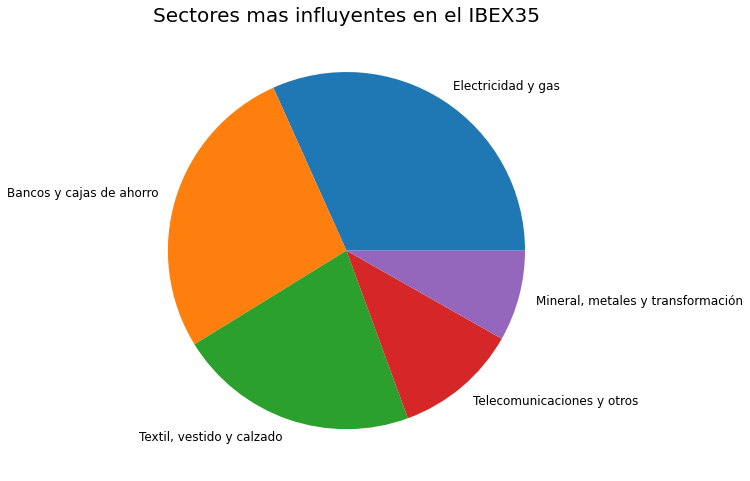

<Figure size 432x288 with 0 Axes>

In [513]:
plt.figure(figsize=(8,12))
sector.plot(kind='pie',  subplots=True, fontsize=12, ylabel='')
plt.title("Sectores mas influyentes en el IBEX35", fontsize=20)
plt.show()

plt.savefig("Ibex.jpg") #nos guarda la imagen

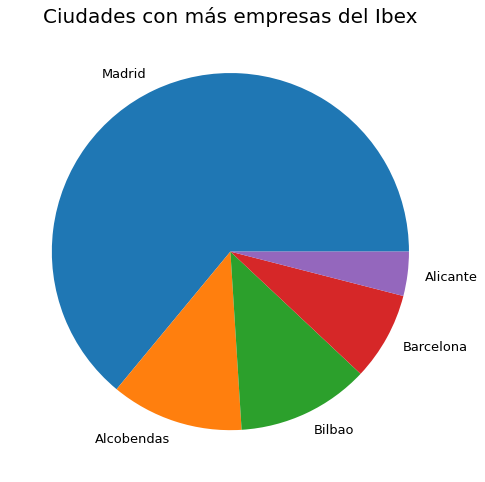

<Figure size 432x288 with 0 Axes>

In [462]:
unido.groupby('Sede').Empresa.count().nlargest(5).plot(kind='pie',  subplots=True, figsize=(8,15), fontsize=13, ylabel='')
plt.title('Ciudades con más empresas del Ibex', fontsize=20)
plt.show()



In [516]:
plt.savefig("Ciudades Ibex.png") #nos guarda la imagen

<Figure size 432x288 with 0 Axes>

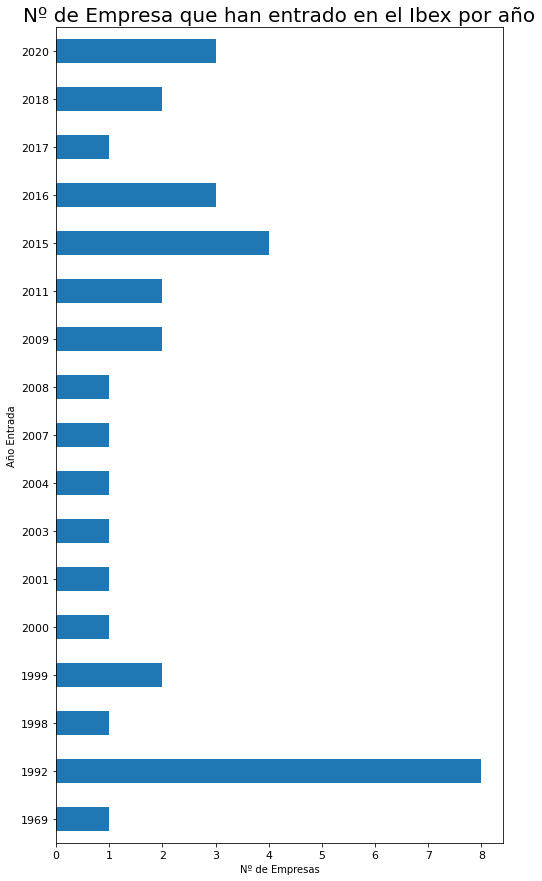

<Figure size 432x288 with 0 Axes>

In [514]:
unido.groupby('Entrada').Empresa.count().plot(kind='barh',  subplots=True, figsize=(8,15), fontsize=11, ylabel='')
plt.title("Nº de Empresa que han entrado en el Ibex por año", fontsize=20)
plt.ylabel('Año Entrada')
plt.xlabel('Nº de Empresas')
plt.show()


plt.savefig("Empresa.jpg")

In [495]:
pip install python-docx

  Created wheel for python-docx: filename=python_docx-0.8.10-py3-none-any.whl size=184495 sha256=22caf9f1833ee9caf47251d78062eb3492d3a7f0d51e873f7fad5ed2fa2a09f3
  Stored in directory: c:\users\jgarr\appdata\local\pip\cache\wheels\97\4c\2e\68066cbf12b9b2e66403da8982aaf4f656d9f5cb5dc3179e82
Successfully built python-docx
Note: you may need to restart the kernel to use updated packages.


Vamos a crear ahora un informe en Word automatizado para que guarde nuestras imagenes

In [515]:

from docx import Document
from docx.shared import Inches


document = Document()
document.add_heading("Informe Automatizado", level=0)
document.add_heading("Análisis empresas Ibex35", level=1)
document.add_heading("1. Los Sectores más representativos del Ibex35", level=2)
document.add_paragraph("Podemos comprobar que los valores más representativos del Ibex 35 son Electricidad y Gas, que supone un 22% del Ibex, seguido de la Banca")

document.add_picture("Ibex.jpg")
                                
document.save('Ibex.docx')